<a href="https://colab.research.google.com/github/Vaishnavipadwad/HOTEL-BOOKING-ANALYSIS/blob/main/Hotel_Booking_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we will import the basic libraries as follows :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we have to download dataset to use it as a pandas dataframe.

In [3]:
path= '/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv'
df = pd.read_csv(path)


Now we will check the total number of rows and columns in the given dataset by using shape method.

In [4]:
df.shape

(119390, 32)

Now we will see the first and last five rows of the dataset by using the head and tail functions, resp.

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Now we will delete the duplicate values from the dataset by using drop function

In [7]:
df=df.drop_duplicates()

again we will check the rows and columns of the given dataset.

In [8]:
df.shape

(87396, 32)

Now we check the null values in all the columns 

In [9]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


from the above chart we can observe that, the columns company and agent have maximum number of null values, we will drop the two columns as it won't affect our dataset. 

In [10]:
df=df.drop(['agent','company'] , axis=1)


Now we noticed some outliers, we look into it in deep by seeing the min and max values of the columns by using describe function

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Now we will get that columns  lead_time, adults, children, babies, previous_cancellations, previous-bookings_not_canceled, booking_changes,days_in_waiting_list, adr,  have drastic difference in their min and max values so will replace this outliers using nearby values

In [12]:
df.loc[df.lead_time > 400, 'lead_time'] = 400
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.children > 8, 'children'] = 0
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.adr > 1000, 'adr'] = 1000

Now we will replace the outliers hence our dataset is cleaned now.

Now we will take all data visulizations of the univariants columns one by one some by piecharts or some by bar graphs 

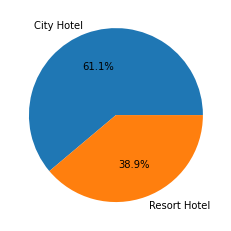

In [13]:
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.show()

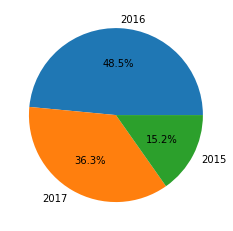

In [14]:
labels = df['arrival_date_year'].value_counts().index.tolist()
sizes = df['arrival_date_year'].value_counts().tolist()
plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.show()

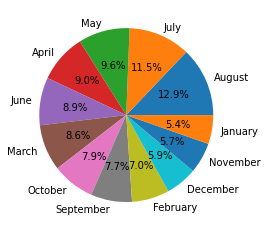

In [15]:
labels = df['arrival_date_month'].value_counts().index.tolist()
sizes = df['arrival_date_month'].value_counts().tolist()
plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.show()

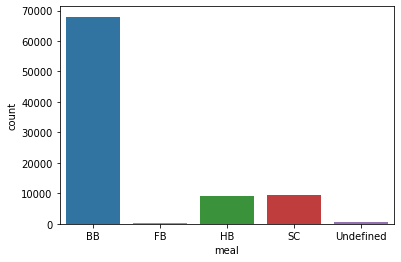

In [16]:
sns.countplot(x=df['meal'])
plt.show()

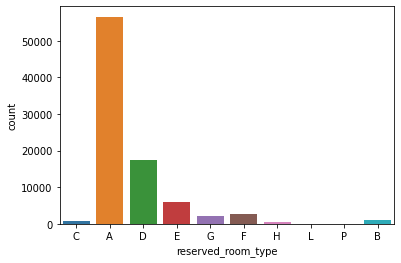

In [17]:
sns.countplot(x=df['reserved_room_type'])
plt.show()


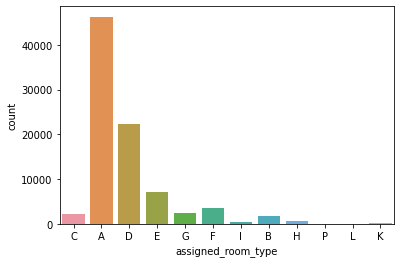

In [18]:
sns.countplot(x=df['assigned_room_type'])
plt.show()


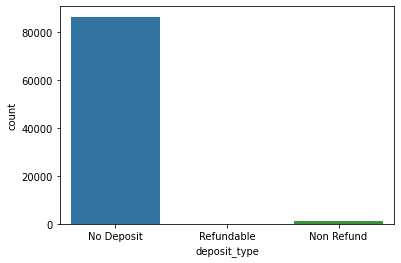

In [19]:
sns.countplot(x=df['deposit_type'])
plt.show()

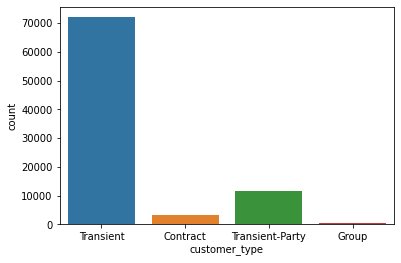

In [20]:
sns.countplot(x=df['customer_type'])
plt.show()


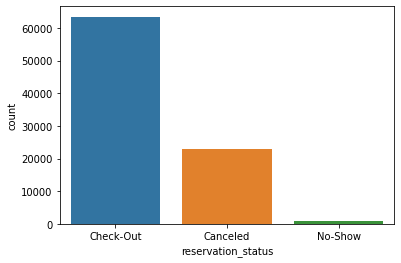

In [21]:
sns.countplot(x=df['reservation_status'])
plt.show()

The insights from above all uni-variate variables can be given as -

1] City Hotels have more percent of total bookings than resort hotels.Approximately, city hotels are twice in the total bookings than in resort hotels

2] 2016 is the year of maximum bookings. Approximately, 49% of the total bookings are done in this year.

3] August is the month of highest bookings followed by July and May.

4] BB type of meal is maximum preferred by customers of both the hotels.

5] 'A' type of room is booked by maximum number of customers in both hotels

6] Similarly, 'A' type of room is assigned to maximum number of customers in both the hotels.

7] Maximum number of customers booked the hotels without deposit 

8] 'Transient' type of the customers are coming in maximum amount in both the hotels.

9] Most of the customers checked out from the hotels already.

Now we will compare hotel columns with some other columns so just to get the more insights of hotels by them.

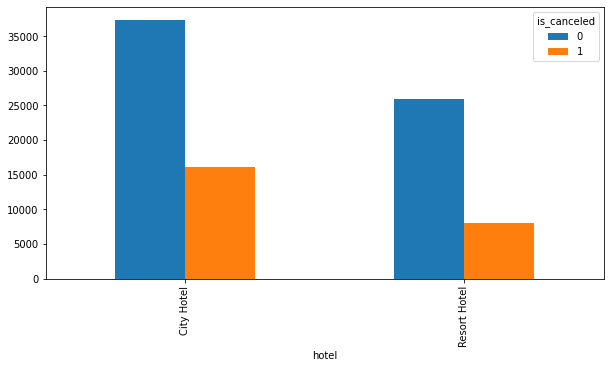

In [22]:
df1 = df.groupby(['hotel','is_canceled']).size().unstack()
df1.plot(kind="bar",figsize=(10,5))

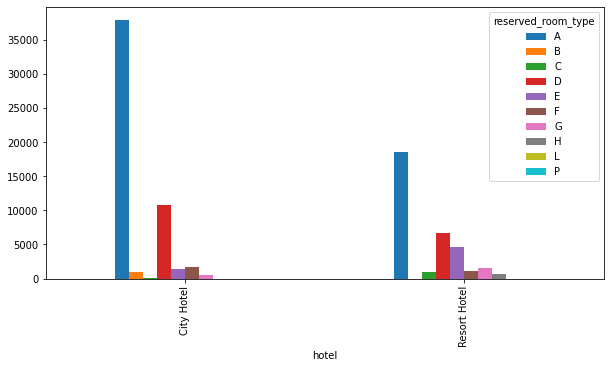

In [23]:
df2 = df.groupby(['hotel','reserved_room_type']).size().unstack()
df2.plot(kind="bar",figsize=(10,5))

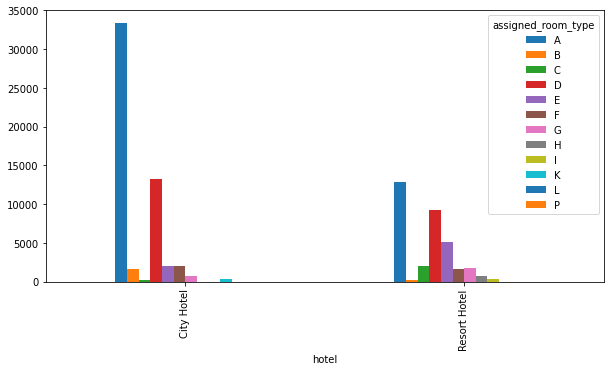

In [24]:
df3 = df.groupby(['hotel','assigned_room_type']).size().unstack()
df3.plot(kind="bar",figsize=(10,5))

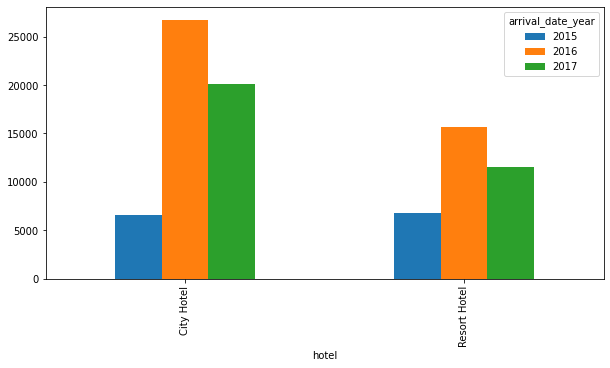

In [25]:
df5 = df.groupby(['hotel','arrival_date_year']).size().unstack()
df5.plot(kind="bar",figsize=(10,5))

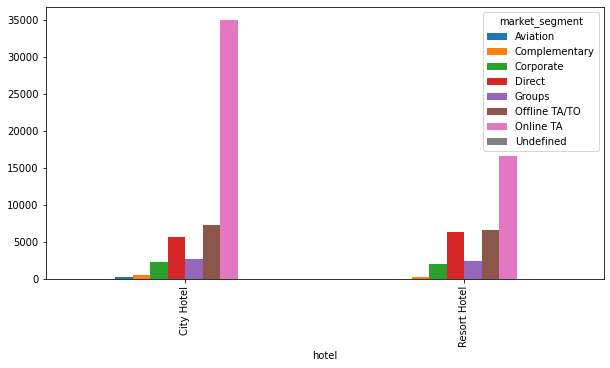

In [26]:
df6 = df.groupby(['hotel','market_segment']).size().unstack()
df6.plot(kind="bar",figsize=(10,5))

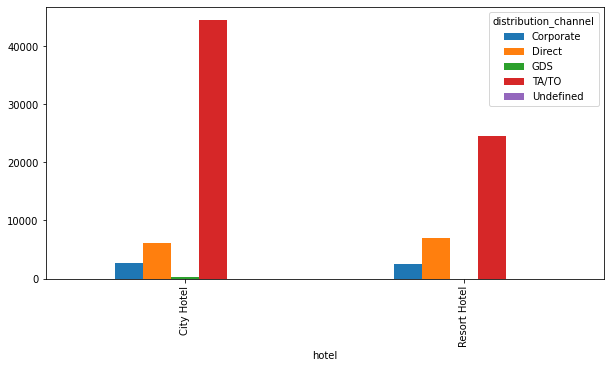

In [27]:
df7 = df.groupby(['hotel','distribution_channel']).size().unstack()
df7.plot(kind="bar",figsize=(10,5))

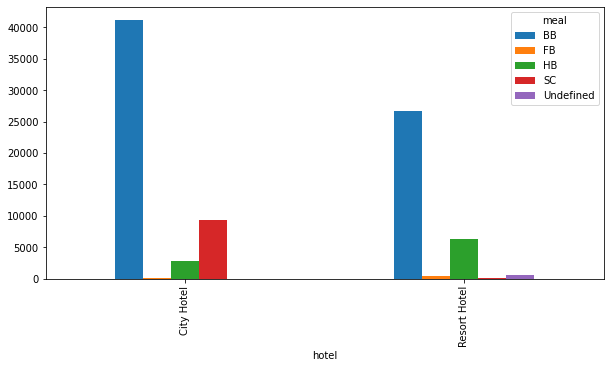

In [28]:
df8 = df.groupby(['hotel','meal']).size().unstack()
df8.plot(kind="bar",figsize=(10,5))

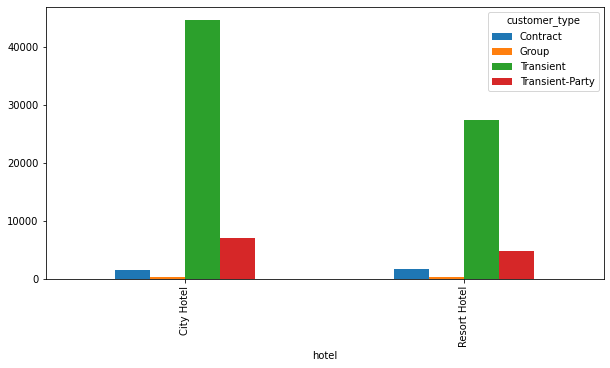

In [29]:
df9 = df.groupby(['hotel','customer_type']).size().unstack()
df9.plot(kind="bar",figsize=(10,5))

Now we will get various insights of 'hotel' columns from all above graphs can be given as -

1] The rate of cancellations is  minimum in both the hotels

2] Online TA is most used market segment in both the hotels 

3] TA/TO is highest among all distribution channels in both hotels.

Now we will take data visualizations of various bi-variate columns one by one -

1] Country VS Market-Segment data visualization 

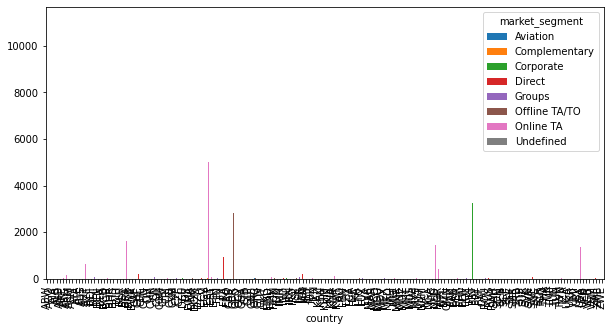

In [30]:
df10 = df.groupby(['country','market_segment']).size().unstack()
df10.plot(kind="bar",figsize=(10,5))

Online TA is mostly preferred market-segment by other country customers, also.

2] Country VS Distribution channel -

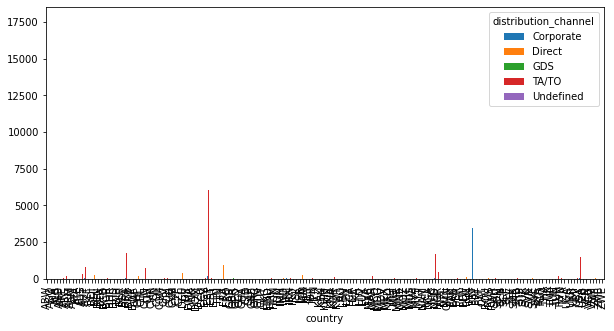

In [31]:
df11 = df.groupby(['country','distribution_channel']).size().unstack()
df11.plot(kind="bar",figsize=(10,5))

Similary, TA/TO is most preferred distribution channel by the other country customers.

3] Cancelled and Not-Cancelled bookings in Arrival Date year-

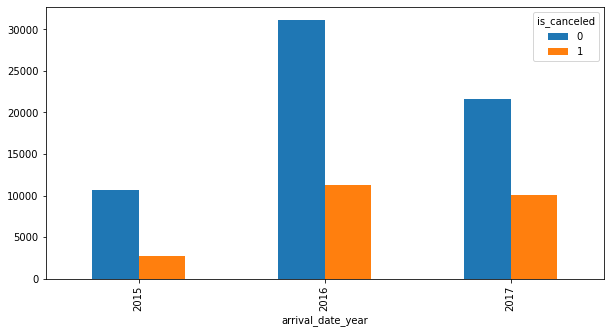

In [32]:
df12 = df.groupby(['arrival_date_year','is_canceled']).size().unstack()
df12.plot(kind="bar",figsize=(10,5))

Of course, the not-cancelled bookings are in maximum amount in all three years 

4] Cancelled and not-cancelled bookings in Arrival date month - 

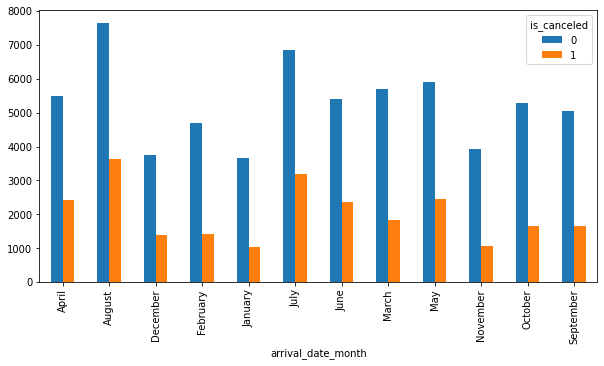

In [33]:
df13 = df.groupby(['arrival_date_month','is_canceled']).size().unstack()
df13.plot(kind="bar",figsize=(10,5))

Maximum confirmed bookings are done in August month followed by July and May
also maximum cancelled bookings are also done August month followed by July and April.

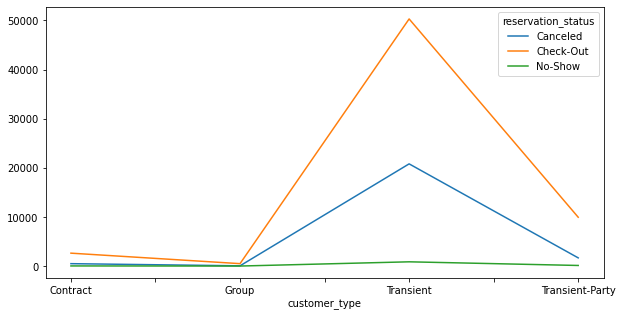

In [34]:
df14 = df.groupby(['customer_type','reservation_status']).size().unstack()
df14.plot(figsize=(10,5))

Transient type of customers are mostly checked out from the hotels already on the other hand the Group type of customers are least checked out from the hotels.

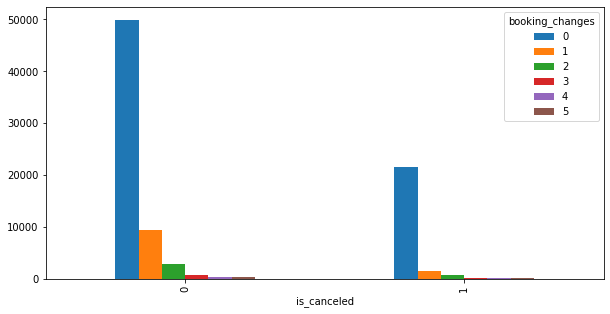

In [35]:
df15 = df.groupby(['is_canceled','booking_changes']).size().unstack()
df15.plot(kind="bar",figsize=(10,5))

Customers having zero booking changes are mostly not cancelling bookings followed by customers having 1 and 2 bookings changes 

Now we will see some informative questions one by one-






Explaing the variations of the changes in bookings all over the months.


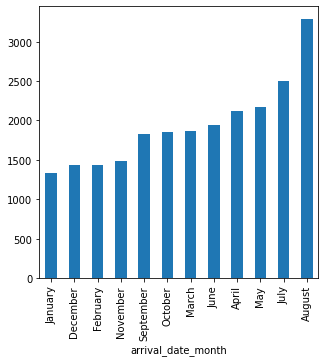

In [37]:
df16 = df.groupby(['arrival_date_month'])['booking_changes'].sum().sort_values()
df16.plot(kind="bar",figsize= (5,5))

Changes in bookings are most in month of August followed by July on the other hands it is minimum in month of January 

2] Explain the correlations of all the columns by using heatmap

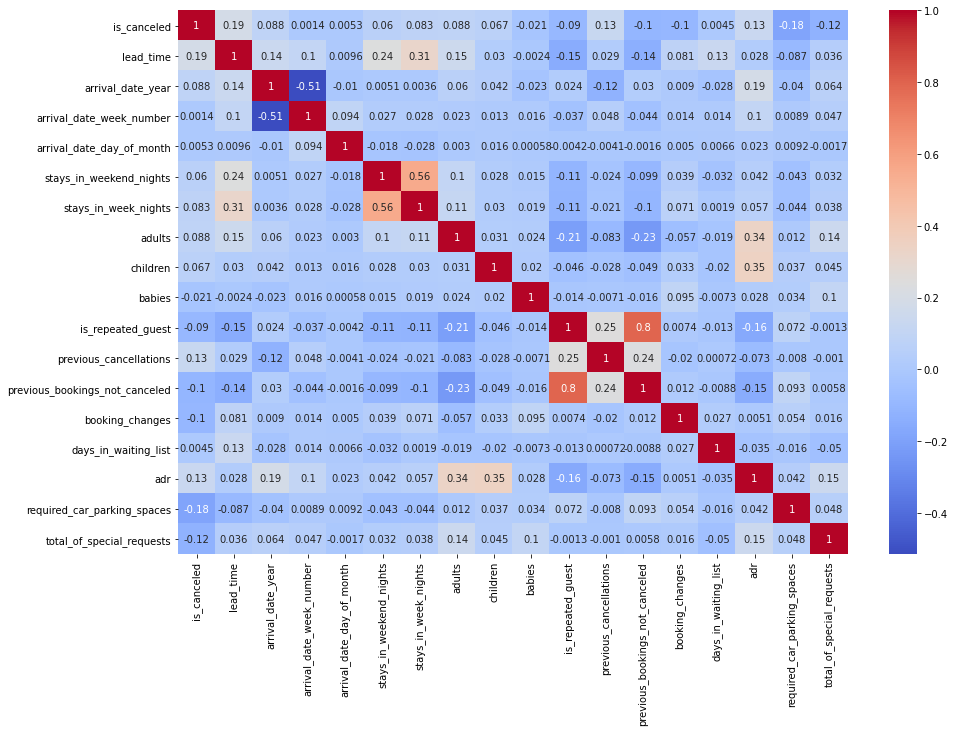

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)